Given a sample $x$, they produce two views $x_1$ and $x_2$ sampled from the same augmentation family $T$, i.e., $x_1 \in T$ and $x_2 \in T$.

Consequently, we can use two separate augmentations, such that one augmentation is **weak** and the other is **strong**.



In [1]:
import sys
sys.path.append('../../')

import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load Data

train_data = np.loadtxt("../CBF_TRAIN.tsv", delimiter='\t')
test_data = np.loadtxt("../CBF_TEST.tsv", delimiter='\t')

print(f'Train samples: {train_data.shape[0]}')
print(f'Test samples: {test_data.shape[0]}')

X_train = train_data[:, 1:].reshape(30, 128, 1)
y_train = train_data[:, 0]

X_test = test_data[:, 1:].reshape(900, 128, 1)
y_test = test_data[:, 0]

Train samples: 30
Test samples: 900


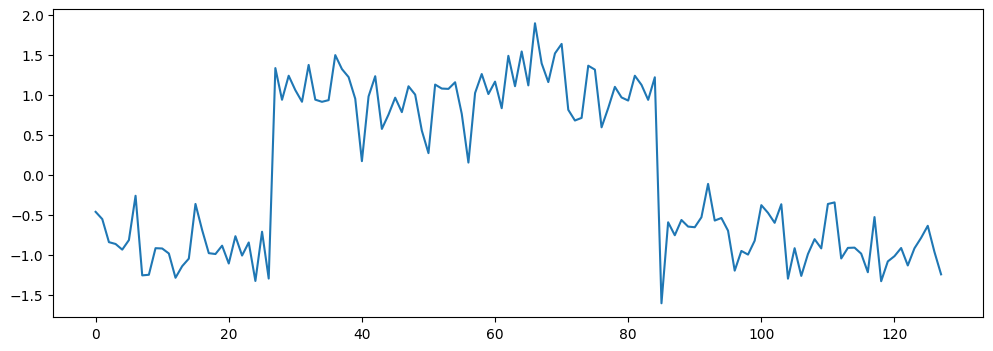

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(list(range(X_train[0].shape[0])), X_train[0, :, 0])
plt.show()

# Augmentation Methods

References:
- https://arxiv.org/pdf/2002.12478.pdf

## Basic Approaches

### Jittering

References:
- https://arxiv.org/pdf/1706.00527.pdf

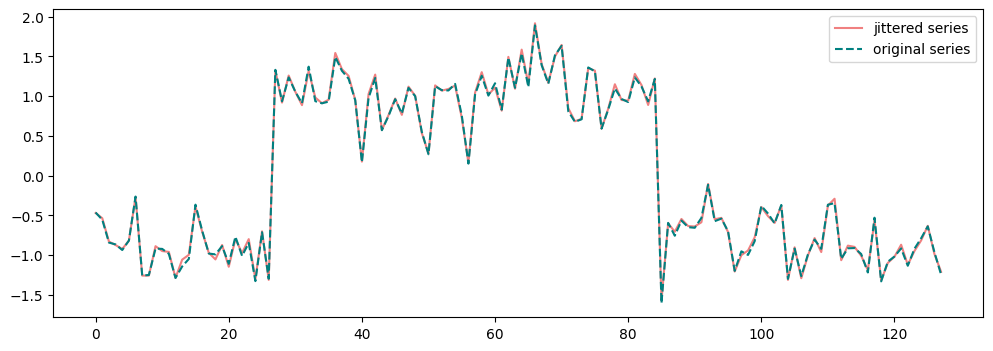

In [4]:
from occts.augmentation.basic import Jitter

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), Jitter()(X_train)[0, :, 0].tolist(), 'lightcoral', label='jittered series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Scaling

References: 
- https://arxiv.org/pdf/1706.00527.pdf

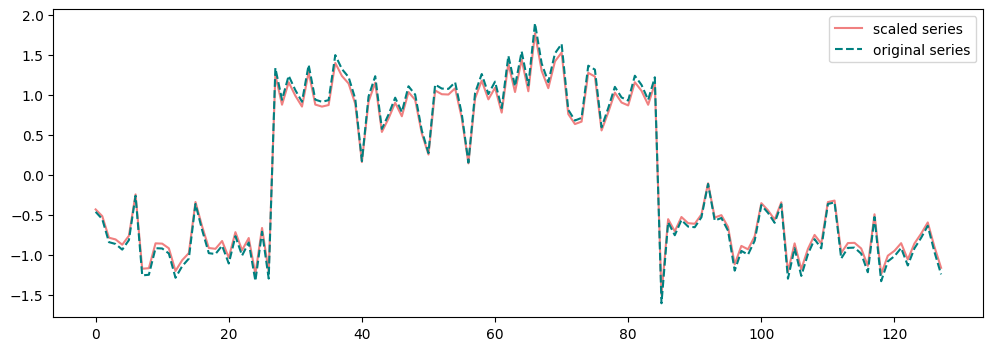

In [5]:
from occts.augmentation.basic import Scale

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), Scale()(X_train)[0, :, 0].tolist(), 'lightcoral', label='scaled series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Flipping/Rotation

References:

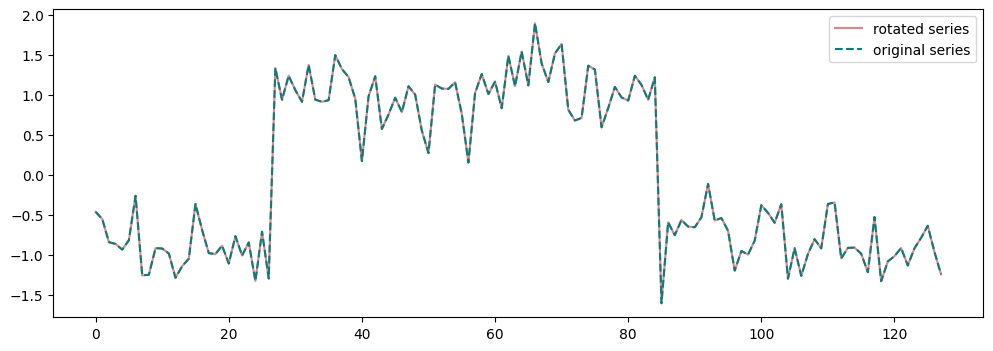

In [6]:
from occts.augmentation.basic import Rotate

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), Rotate()(X_train)[0, :, 0].tolist(), 'lightcoral', label='rotated series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Permutation

References:


C:\Users\Gilberto\Desktop\Projects\occts\notebooks\data augmentation\../..\occts\augmentation\basic.py:151: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


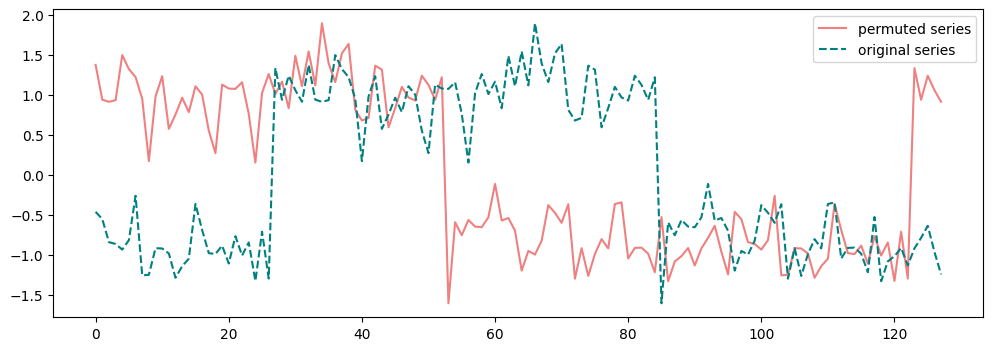

In [7]:
from occts.augmentation.basic import Permute

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), Permute()(X_train)[0, :, 0].tolist(), 'lightcoral', label='permuted series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

## Advanced Approaches

### Magnitude Warping

References:
- T. T. Um et al, "Data augmentation of wearable sensor data for parkinson’s disease monitoring using convolutional neural networks," in ACM ICMI, pp. 216-220, 2017.

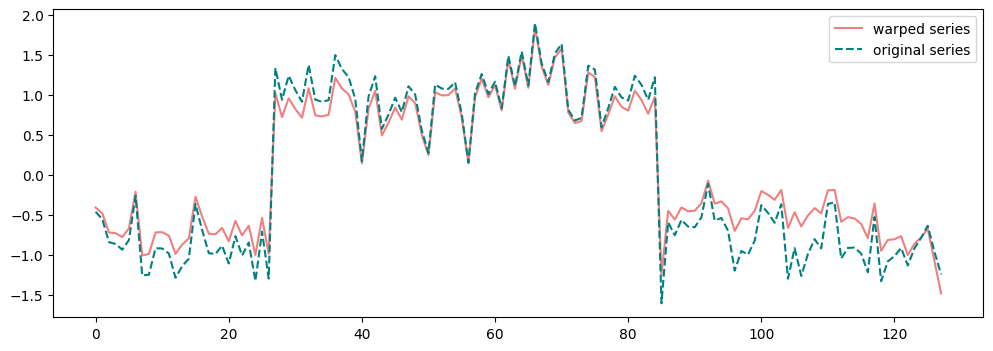

In [8]:
from occts.augmentation.advanced import MagnitudeWarp

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), MagnitudeWarp()(X_train)[0, :, 0].tolist(), 'lightcoral', label='warped series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Time Warping

References:
- T. T. Um et al, "Data augmentation of wearable sensor data for parkinson’s disease monitoring using convolutional neural networks," in ACM ICMI, pp. 216-220, 2017.

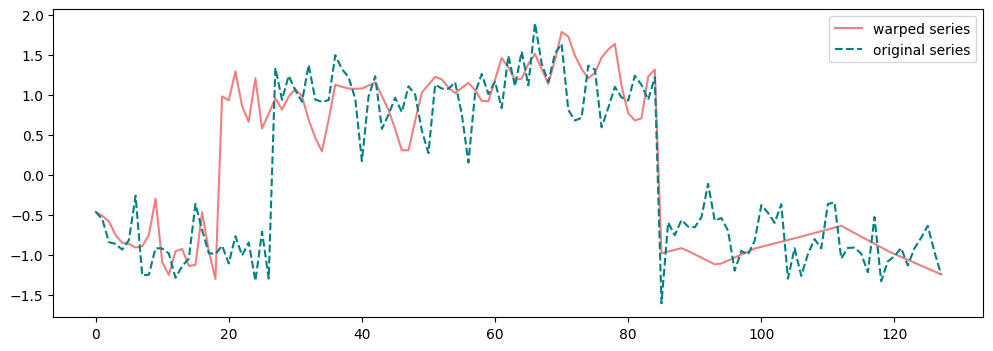

In [9]:
from occts.augmentation.advanced import TimeWarp

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), TimeWarp()(X_train)[0, :, 0].tolist(), 'lightcoral', label='warped series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Window Slicing

References:
- A. Le Guennec, S. Malinowski, R. Tavenard, "Data Augmentation for Time Series Classification using Convolutional Neural Networks," in ECML/PKDD Workshop on Advanced Analytics and Learning on Temporal Data, 2016.
- https://halshs.archives-ouvertes.fr/halshs-01357973/document

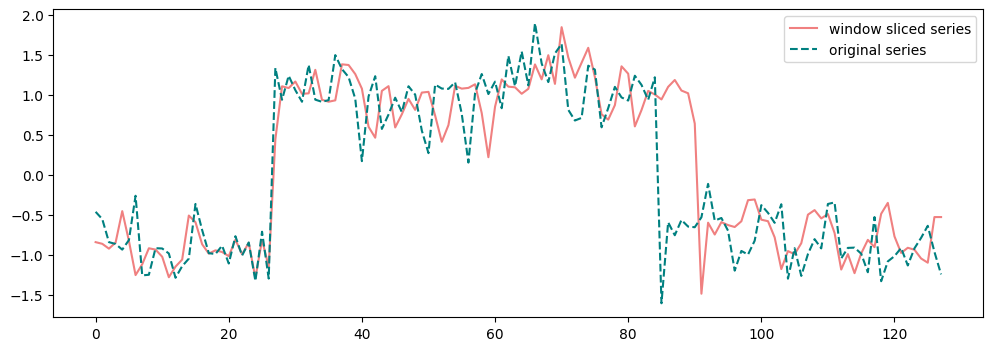

In [10]:
from occts.augmentation.advanced import WindowSlice

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), WindowSlice()(X_train)[0, :, 0].tolist(), 'lightcoral', label='window sliced series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Window Warping

References:
- A. Le Guennec, S. Malinowski, R. Tavenard, "Data Augmentation for Time Series Classification using Convolutional Neural Networks," in ECML/PKDD Workshop on Advanced Analytics and Learning on Temporal Data, 2016.
- https://halshs.archives-ouvertes.fr/halshs-01357973/document

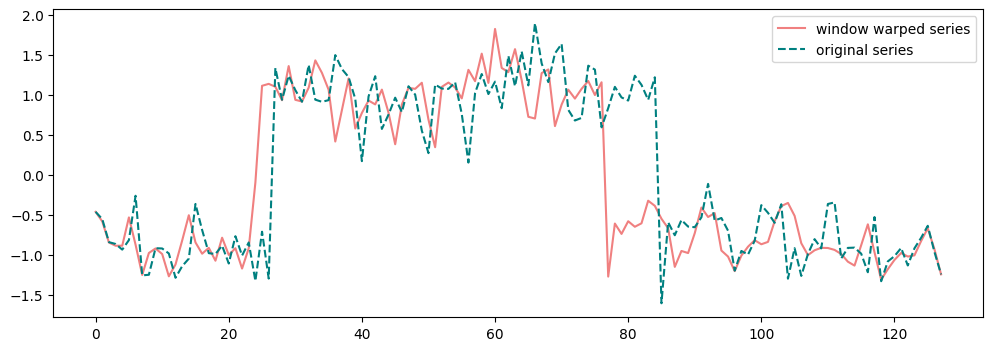

In [11]:
from occts.augmentation.advanced import WindowWarp

plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), WindowWarp()(X_train)[0, :, 0].tolist(), 'lightcoral', label='window warped series')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### SuboPtimAl Warped time-series geNEratoR (SPAWNER)

References:
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6983028/
- K. Kamycki, T. Kapuscinski, M. Oszust, "Data Augmentation with Suboptimal Warping for Time-Series Classification," Sensors, vol. 20, no. 1, 2020.

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 191.08it/s]


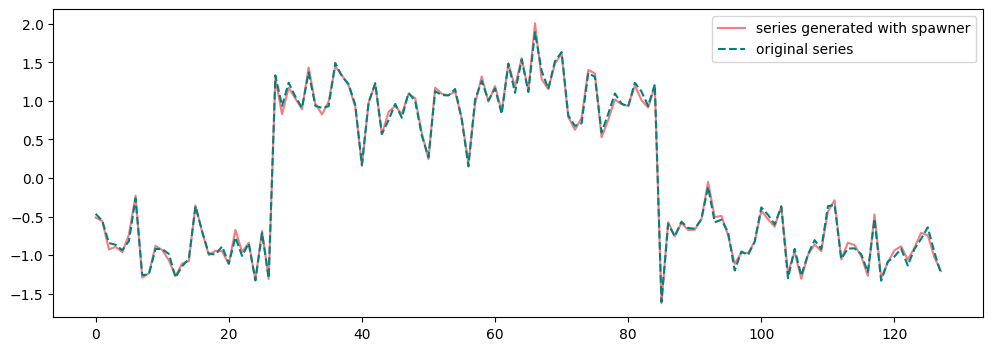

In [12]:
from occts.augmentation.advanced import Spawner


plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), Spawner()(X_train, y_train)[0, :, 0].tolist(), 'lightcoral', label='series generated with spawner')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Weighted Dynamic Time Warping Barycenter Averaging (wDBA)

References:
- G. Forestier, F. Petitjean, H. A. Dau, G. I. Webb, E. Keogh, "Generating Synthetic Time Series to Augment Sparse Datasets," in IEEE ICDM, 2017.
- https://ieeexplore.ieee.org/document/8215569

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.31it/s]


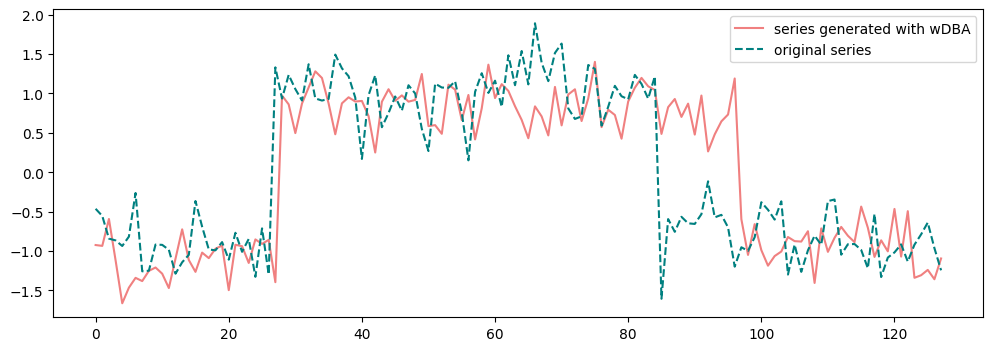

In [3]:
from occts.augmentation.advanced import WDBA


plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), WDBA()(X_train, y_train)[0, :, 0].tolist(), 'lightcoral', label='series generated with wDBA')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Random Guided Warping (RGW)

References:
- B. K. Iwana, S. Uchida, "Time Series Data Augmentation for Neural Networks by Time Warping with a Discriminative Teacher," arXiv, 2020.

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 193.55it/s]


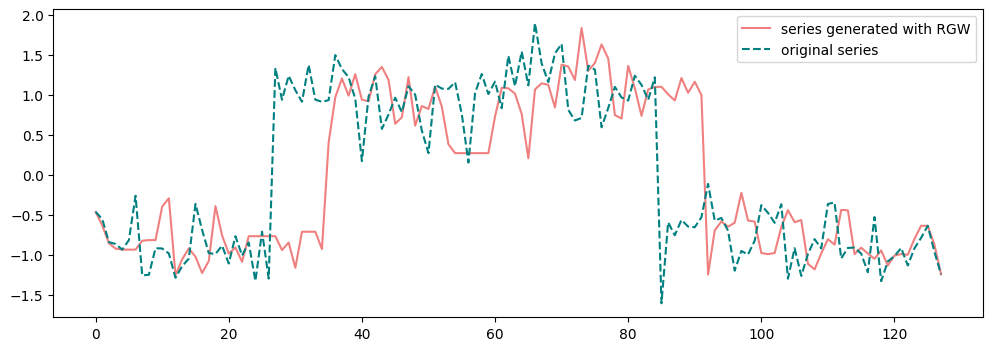

In [3]:
from occts.augmentation.advanced import RandomGuidedWarp


plt.figure(figsize=(12, 4))
plt.plot(list(range(128)), RandomGuidedWarp()(X_train, y_train)[0, :, 0].tolist(), 'lightcoral', label='series generated with RGW')
plt.plot(list(range(128)), X_train[0, :, 0], 'teal', label='original series', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

### Discriminative Guided Warping (DGW)

References:
- B. K. Iwana, S. Uchida, "Time Series Data Augmentation for Neural Networks by Time Warping with a Discriminative Teacher," arXiv, 2020.

In [4]:
WindowWarp()

WindowWarp(window_ratio=0.1, scales={self._scales})